### Linear Regression Intro

_(Approaching Linear Regression by example)_

In this simple machine learning example, we want to predict house prices. We have data of some houses around the neighborhood:

* John's house has 1 bedroom, and is valued in \$3
* Mary's house has 2 bedrooms, and is valued in \$6
* Monique's house has 3 bedrooms, and is valued in \$10
* Kevin's house has 4 bedrooms, and is valued in \$11

We'll use "number of bedrooms" as the predictor of a new house. We call this variable, "a feature". We want to predict these other 2 houses:

* Rose just moved in, she has 2.5 bedrooms (a really tiny one, that's the .5)
* Laurie will move in the next month, her house will have 5 bedrooms.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll

from sklearn.metrics import mean_squared_error

%matplotlib inline

In this "experiment" we have to sets of data:

* one that we know all the details about (John, Mary, Monique and Kevin). We'll call this one the "`training`" set.
* and the other that we want to predict (Rose and Laurie).

Let's create the variables:

In [2]:
train_features = [1, 2, 3, 4]  # No. of bedrooms
train_prices = [3, 6, 10, 11]  # Price of each house

Linear regression will try to find a pattern of all the prices, "and draw a line" across all your training data to see if there's any match:

Text(0.5,1,'Training Data')

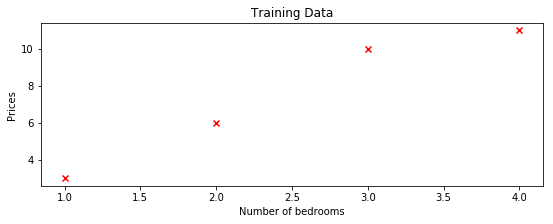

In [15]:
plt.figure(1, figsize=(9, 3))
plt.scatter(train_features, train_prices, marker='x', color='r')
plt.ylabel('Prices')
plt.xlabel('Number of bedrooms')
plt.title('Training Data')

There clearly is a trend. As the number of bedrooms increase, the value also increases. And, it can even seem to increase linearly. If we could "figure out" this linear trend, we could predict future prices.

Mathematically, we say that the price is a function of the number of bedrooms, and we could express it in this way:

\begin{align}
Price(x) = m x + b
\end{align}

In this case, `x` is the number of bedrooms. For example, what if we define `m` = 3, and try to plot it, how does it look like?

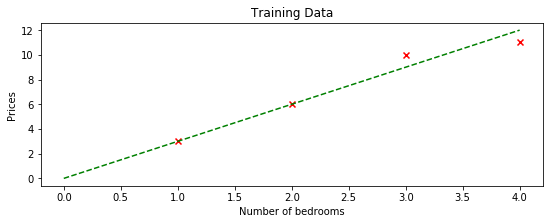

In [25]:
plt.figure(1, figsize=(9, 3))
plt.scatter(train_features, train_prices, marker='x', color='r')
plt.ylabel('Prices')
plt.xlabel('Number of bedrooms')
plt.title('Training Data')

plt.plot([0, 1, 4], [0, 3, 12], 'g--')

Looks pretty accurate, right? So, where should we predict the values of the houses of Rose and Laurie?

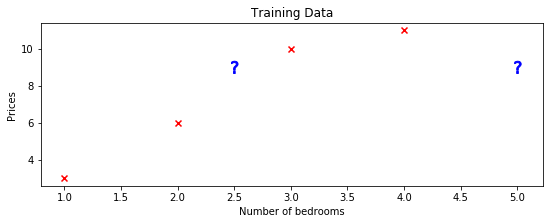

In [18]:
plt.figure(1, figsize=(9, 3))
plt.scatter(train_features, train_prices, marker='x', color='r')
plt.ylabel('Prices')
plt.xlabel('Number of bedrooms')
plt.title('Training Data')

plt.scatter([2.5, 5], [9, 9], marker='$?$', color='b', s=[150, 150])

According to our linear model, the prices of Rose's and Laurie's houses should be:

* Rose, 2.5 bedrooms: `Price(2.5) = 3 * 2.5 = $7.5`
* Laurie, 5 bedrooms: `Price(5) = 3 * 5 = $15`

How does it look like in the plot?

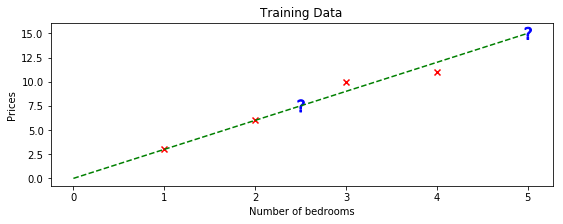

In [22]:
plt.figure(1, figsize=(9, 3))
plt.scatter(train_features, train_prices, marker='x', color='r')
plt.ylabel('Prices')
plt.xlabel('Number of bedrooms')
plt.title('Training Data')

plt.scatter([2.5, 5], [7.5, 15], marker='$?$', color='b', s=[150, 150])
plt.plot([0, 1, 5], [0, 3, 15], 'g--')

**Congratulations! This is your first Machine Learning model**. Regression is the simplest form of Machine Learning, and there are a broad category of regressions: linear (what we just did), logistic, Polynomial, etc.

### A more formal (but still simple) definition

Linear regression works for more features; in our example we were using just 1, the number of bedrooms. But given, a set of features `[x1, x2, ..., xn]`, the objective of linear regression is to find parameters `[w1, w2, w3, ..., wn]` and `β` that let you create the regression function:

\begin{align}
\hat{y} = w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} + \beta
\end{align}

In our previous example, we had that:

\begin{align}
Price(x) = w_{1}x_{1} + \beta
\end{align}

`x1` was our only variable, and our parameters were: `x1 = 3`, `β = 0`. But, how did we find them? It is, of course, an unrealistically simple example. What if the example is not so simple? We could just "guess" different parameters and see which ones work better:

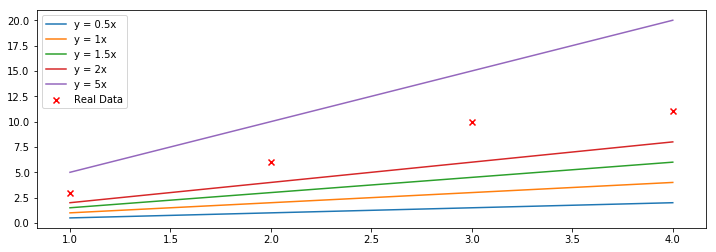

In [27]:
plt.figure(figsize=(12, 4))
testing_slopes = [.5, 1, 1.5, 2, 5]
for m in testing_slopes:
    h = lambda x: m * x
    h_results = [h(x) for x in train_features]
    plt.plot(train_features, h_results)
    
plt.scatter(train_features, train_prices, marker='x', color='r')
plt.legend(['y = {}x'.format(x) for x in testing_slopes] + ['Real Data'])


Now, even though we've "guessed" different approximations of the parameters `wi`, some of the above functions look better than others. And we can actually "measure" the effectiveness of our approximation. For example, the guess `y = 0.5x` gives use these values:

In [28]:
[0.5 * x for x in train_features]

[0.5, 1.0, 1.5, 2.0]

Which looks really far off from the true values:

In [30]:
train_prices

[3, 6, 10, 11]

We could actually "measure" the distance between both approximations:

In [31]:
train_prices - np.array([0.5 * x for x in train_features])

array([2.5, 5. , 8.5, 9. ])

And we can also visualize the difference between our bad estimation (using `y= 0.5x`) and the real price.

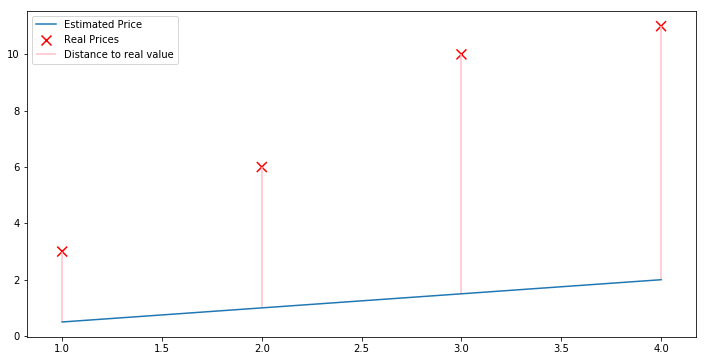

In [52]:
bad_guess = [0.5 * x for x in train_features]

fig, ax = plt.subplots(figsize=(12, 6))

linecoll = matcoll.LineCollection([[(1, 0.5), (1, 3)]], color='pink')

linecoll = matcoll.LineCollection([
    [(x, 0.5*x), (x, p)] for x, p in zip(train_features, train_prices)
], color='pink')
ax.plot(train_features, bad_guess)
    
ax.scatter(train_features, train_prices, marker='x', color='r', s=[100]*4)

ax.add_collection(linecoll)

plt.legend(['Estimated Price', 'Real Prices', 'Distance to real value'])

We could try with a better guess, and see how it behaves. For example, `y = 2.5x`

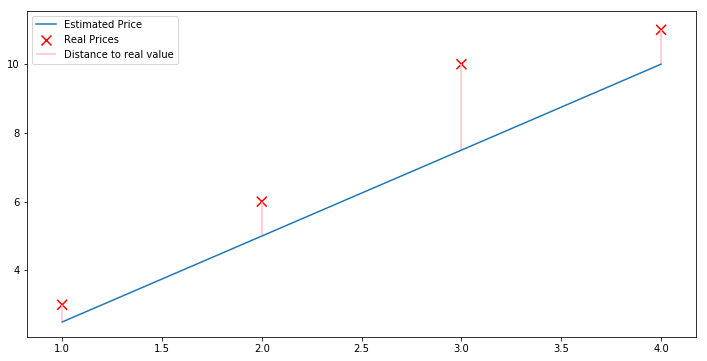

In [53]:
bad_guess = [2.5 * x for x in train_features]

fig, ax = plt.subplots(figsize=(12, 6))

linecoll = matcoll.LineCollection([[(1, 0.5), (1, 3)]], color='pink')

linecoll = matcoll.LineCollection([
    [(x, 2.5*x), (x, p)] for x, p in zip(train_features, train_prices)
], color='pink')
ax.plot(train_features, bad_guess)
    
ax.scatter(train_features, train_prices, marker='x', color='r', s=[100]*4)

ax.add_collection(linecoll)

plt.legend(['Estimated Price', 'Real Prices', 'Distance to real value'])

This is clearly a better guess, but it's still a little bit far off. There are actually different ways to "compare" your guesses and see which one would perform better based on the real data that you have. The most common method is known as [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error). The [scikit-learn](http://scikit-learn.org/stable/index.html) machine learning package contains a simple implementation that we can use: `mean_squared_error`.

For example, the error between the real data and our awful guess `y = 0.5x` is:

In [58]:
estimation_0_point_5 = [0.5 * x for x in train_features]
mean_squared_error(train_prices, estimation_0_point_5)

46.125

and compared to `y = 2.5x`:

In [60]:
estimation_2_point_5 = [2.5 * x for x in train_features]
mean_squared_error(train_prices, estimation_2_point_5)

2.125

The error of `y = 2.5x` is significantly less than `y = 0.5x`, as we already knew.